# 1. 라이브러리

In [1]:
''' 경고 무시 '''
import warnings
warnings.filterwarnings('ignore')

''' Tensorflow-GPU '''
import tensorflow as tf
from tensorflow.python.client import device_lib

''' 데이터 프레임 '''
import pandas as pd

''' 연산 '''
import numpy as np

''' 시각화 '''
import missingno as msno
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

''' 전처리 '''
import sklearn
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

''' 상관분석 '''
import scipy
import scipy.stats as stats

''' 머신러닝 알고리즘 '''
from sklearn.svm import SVC                               
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

print('Graphics Card Driver')
print(device_lib.list_local_devices())
print('')
print('')
print('')
print('++ Version of Used Libraries ++')
print('')
print('   - Tensorflow :', tf.__version__)
print('   - Pandas :', pd.__version__)
print('   - Numpy :', np.__version__)
print('   - Missingno :', msno.__version__)
print('   - Seaborn :', sns.__version__)
print('   - Matplotlib :', matplotlib.__version__)
print('   - sklearn :', sklearn.__version__)
print('   - scipy :', scipy.__version__)

Graphics Card Driver
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17012278063502882696
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6667611669
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7468600494814102719
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
]



++ Version of Used Libraries ++

   - Tensorflow : 1.14.0
   - Pandas : 0.25.1
   - Numpy : 1.17.2
   - Missingno : 0.4.2
   - Seaborn : 0.9.0
   - Matplotlib : 3.1.1
   - sklearn : 0.21.3
   - scipy : 1.3.1


# 2. 데이터

In [2]:
pd_train = pd.read_csv('train.csv')
pd_test = pd.read_csv('test.csv')

In [3]:
pd_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
pd_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('pd_train.shape :', pd_train.shape)
print('pd_test.shape :', pd_test.shape)

pd_train.shape : (891, 12)
pd_test.shape : (418, 11)


# 3. 데이터 탐색적 분석(EDA)

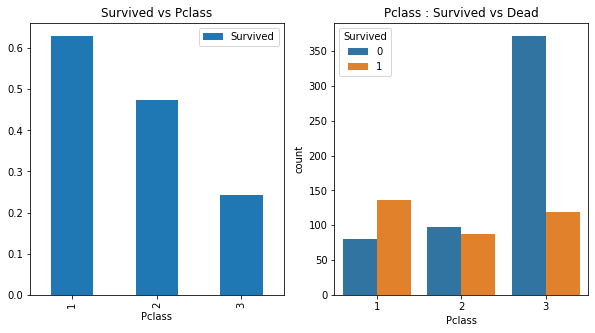

In [6]:
x, y = plt.subplots(1,
                    2,
                    figsize = (10, 5))
pd_train[['Pclass',
          'Survived']].groupby(['Pclass']).mean().plot.bar(ax = y[0])
y[0].set_title('Survived vs Pclass')
sns.countplot('Pclass',
              hue = 'Survived',
              data = pd_train,
              ax = y[1])
y[1].set_title('Pclass : Survived vs Dead')
plt.show()

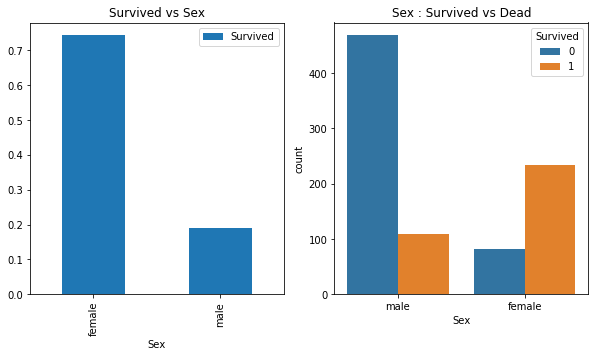

In [7]:
x, y = plt.subplots(1,
                    2,
                    figsize = (10, 5))
pd_train[['Sex',
          'Survived']].groupby(['Sex']).mean().plot.bar(ax = y[0])
y[0].set_title('Survived vs Sex')
sns.countplot('Sex',
              hue = 'Survived',
              data = pd_train,
              ax = y[1])
y[1].set_title('Sex : Survived vs Dead')
plt.show()

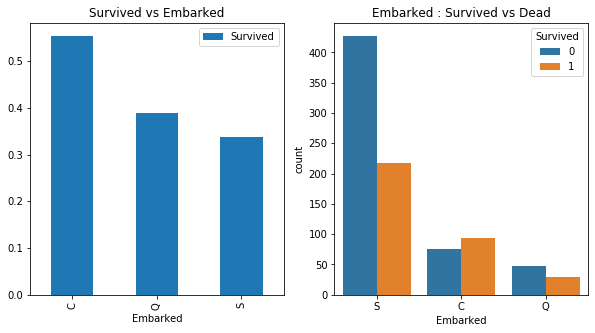

In [8]:
x, y = plt.subplots(1,
                    2,
                    figsize = (10, 5))
pd_train[['Embarked',
          'Survived']].groupby(['Embarked']).mean().plot.bar(ax = y[0])
y[0].set_title('Survived vs Embarked')
sns.countplot('Embarked',
              hue = 'Survived',
              data = pd_train,
              ax = y[1])
y[1].set_title('Embarked : Survived vs Dead')
plt.show()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

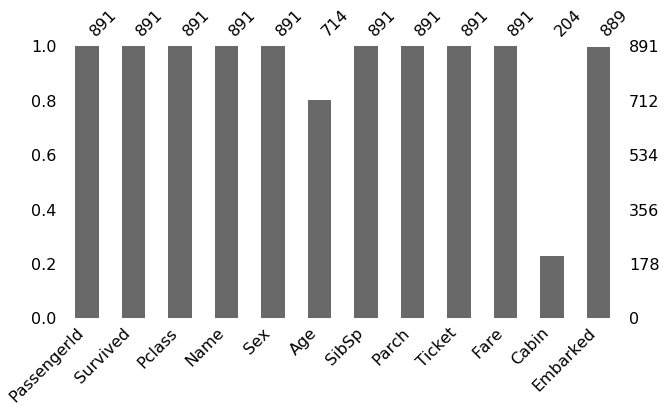

In [9]:
msno.bar(df = pd_train,
         figsize = (10, 5))
pd_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

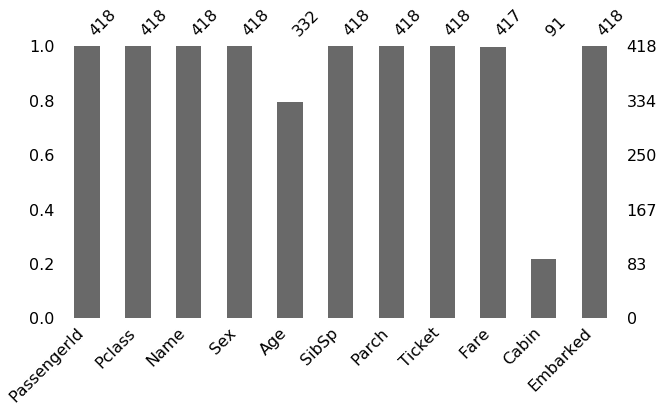

In [10]:
msno.bar(df = pd_test,
         figsize = (10, 5))
pd_test.isnull().sum()

# 4. 데이터 전처리

# 4.1 결측값을 해결하는 첫 번째 방법
- 결측값이 있는 행 전체 삭제

In [11]:
pd_train_a = pd_train.dropna(axis = 0)
pd_test_a = pd_test.dropna(axis = 0)

In [12]:
pd_train_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null object
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [13]:
def name_change_a(df):
    df['NameA'] = df['Name'].str.extract('([A-Za-z]+)\.',
                                         expand = False)
    df['NameA'] = LE.fit_transform(df['NameA']) 
    return df

pd_train_a = name_change_a(pd_train_a)
pd_test_a = name_change_a(pd_test_a)

In [14]:
def sex_change_a(df):
    df['Sex'] = LE.fit_transform(df['Sex']) 
    return df

pd_train_a = sex_change_a(pd_train_a)
pd_test_a = sex_change_a(pd_test_a)

In [15]:
def embarked_change_a(df):
    df['Embarked'] = LE.fit_transform(df['Embarked']) 
    return df

pd_train_a = embarked_change_a(pd_train_a)
pd_test_a = embarked_change_a(pd_test_a)

In [16]:
def cabin_change_a(df):
    df['CabinA'] = df['Cabin'].str.extract('([A-Z]+)',
                                           expand = False)
    df['CabinA'] = LE.fit_transform(df['CabinA'])     
    return df

pd_train_a = cabin_change_a(pd_train_a)
pd_test_a = cabin_change_a(pd_test_a)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
NameA          0
CabinA         0
dtype: int64

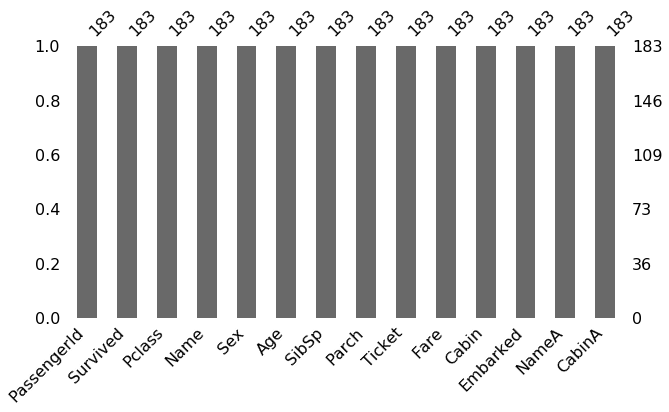

In [17]:
msno.bar(df = pd_train_a,
         figsize = (10, 5))
pd_train_a.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
NameA          0
CabinA         0
dtype: int64

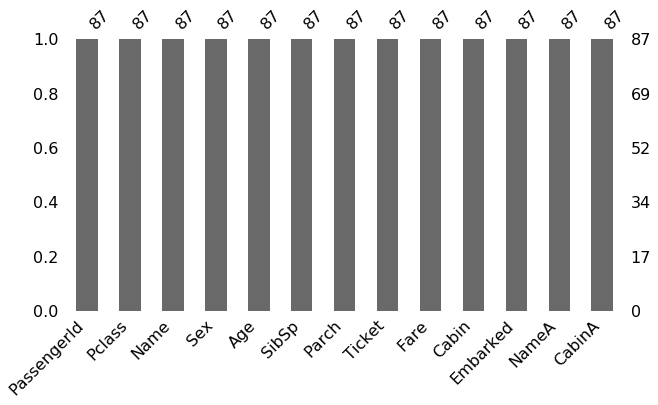

In [18]:
msno.bar(df = pd_test_a,
         figsize = (10, 5))
pd_test_a.isnull().sum()

In [19]:
pd_train_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 14 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null int32
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null int32
NameA          183 non-null int32
CabinA         183 non-null int32
dtypes: float64(2), int32(4), int64(5), object(3)
memory usage: 18.6+ KB


# 4.2 결측값을 해결하는 두 번째 방법
- 대표값으로 결측값 대체

In [20]:
pd_train_b = pd_train.copy()
pd_test_b = pd_test.copy()

In [21]:
pd_train_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
def name_change_b(df):
    df['NameA'] = df['Name'].str.extract('([A-Za-z]+)\.',
                                         expand = False)    
    df['NameA'] = LE.fit_transform(df['NameA'])     
    return df

pd_train_b = name_change_b(pd_train_b)
pd_test_b = name_change_b(pd_test_b)

In [23]:
def sex_change_b(df):
    df['Sex'] = LE.fit_transform(df['Sex']) 
    return df

pd_train_b = sex_change_b(pd_train_b)
pd_test_b = sex_change_b(pd_test_b)

In [24]:
pd_train_b.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
pd_train_b.Embarked = pd_train_b.Embarked.fillna('S')

In [26]:
def embarked_change_b(df):
    df['Embarked'] = LE.fit_transform(df['Embarked']) 
    return df

pd_train_b = embarked_change_b(pd_train_b)
pd_test_b = embarked_change_b(pd_test_b)

In [27]:
pd_train_b.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [28]:
def process_age_b(df):
    df['Age'] = df['Age'].fillna(pd_train_b.Pclass.mean())
    return df

pd_train_b = process_age_b(pd_train_b)
pd_test_b = process_age_b(pd_test_b)

In [29]:
def cabin_change_b(df):
    df['CabinA'] = df['Cabin'].str.extract('([A-Z]+)',
                                           expand = False)
    return df

pd_train_b = cabin_change_b(pd_train_b)
pd_test_b = cabin_change_b(pd_test_b)

In [30]:
pd_train_b.CabinA.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: CabinA, dtype: int64

In [31]:
pd_train_b.CabinA = pd_train_b.Cabin.fillna('C')

In [32]:
pd_test_b.CabinA.value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: CabinA, dtype: int64

In [33]:
pd_test_b.CabinA = pd_test_b.Cabin.fillna('C')

In [34]:
def cabin_change_b(df):
    df['CabinA'] = LE.fit_transform(df['CabinA']) 
    return df

pd_train_b = cabin_change_b(pd_train_b)
pd_test_b = cabin_change_b(pd_test_b)

In [35]:
pd_test_b.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [36]:
pd_test_b['Fare'].fillna(pd_test_b.groupby('Pclass')['Fare'].transform('median'),
                         inplace = True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
NameA            0
CabinA           0
dtype: int64

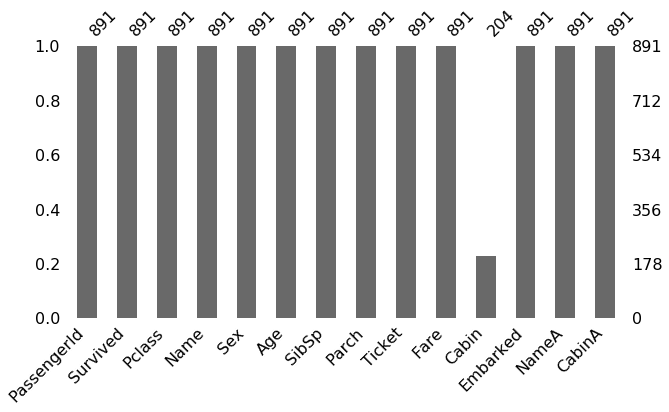

In [37]:
msno.bar(df = pd_train_b,
         figsize = (10, 5))
pd_train_b.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
NameA            0
CabinA           0
dtype: int64

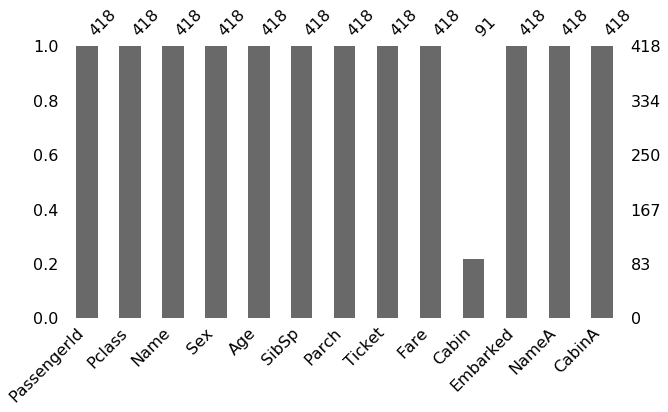

In [38]:
msno.bar(df = pd_test_b,
         figsize = (10, 5))
pd_test_b.isnull().sum()

In [39]:
pd_train_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int32
NameA          891 non-null int32
CabinA         891 non-null int32
dtypes: float64(2), int32(4), int64(5), object(3)
memory usage: 83.7+ KB


# 4.3 결측값을 해결하는 세 번째 방법
- 상관분석으로 결측값 해결

In [40]:
pd_train_c = pd_train.copy()
pd_test_c = pd_test.copy()

In [41]:
pd_train_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
def name_change_c(df):
    df['NameA'] = df['Name'].str.extract('([A-Za-z]+)\.',
                                         expand = False)
    df['NameA'] = LE.fit_transform(df['NameA'])     
    return df

pd_train_c = name_change_c(pd_train_c)
pd_test_c = name_change_c(pd_test_c)

In [43]:
def sex_change_c(df):
    df['Sex'] = LE.fit_transform(df['Sex']) 
    return df

pd_train_c = sex_change_b(pd_train_c)
pd_test_c = sex_change_b(pd_test_c)

In [44]:
pd_train_c.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [45]:
embarked_change_C = {'S' : 1,
                     'C' : 2,
                     'Q' : 3}

pd_train_c['Embarked'] = pd_train_c['Embarked'].map(embarked_change_C)
pd_test_c['Embarked'] = pd_test_c['Embarked'].map(embarked_change_C)

In [46]:
def cabin_change_c(df):
    df['CabinA'] = df['Cabin'].str.extract('([A-Z]+)',
                                           expand = False)
    return df

pd_train_c = cabin_change_c(pd_train_c)
pd_test_c = cabin_change_c(pd_test_c)

In [47]:
pd_train_c.CabinA.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: CabinA, dtype: int64

In [48]:
pd_test_c.CabinA.value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: CabinA, dtype: int64

In [49]:
cabin_change_C = {'C' : 1,
                  'B' : 2,
                  'D' : 3,
                  'E' : 4,
                  'A' : 5,
                  'F' : 6,
                  'G' : 7,
                  'T' : 8}

pd_train_c['CabinA'] = pd_train_c['CabinA'].map(cabin_change_C)
pd_test_c['CabinA'] = pd_test_c['CabinA'].map(cabin_change_C)

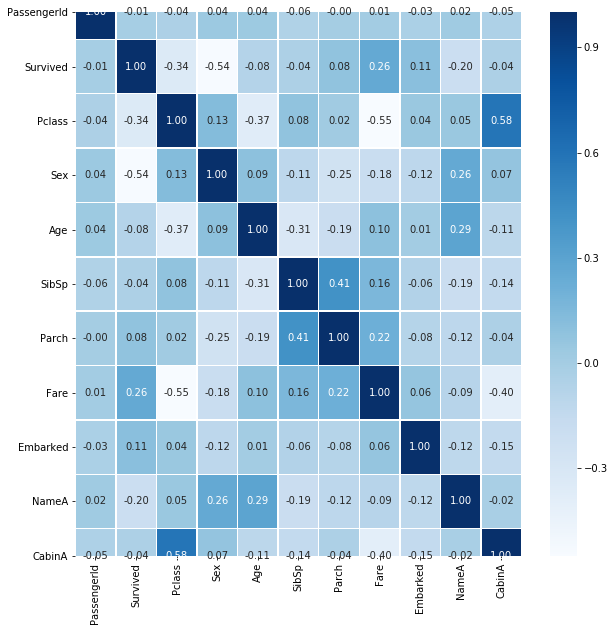

In [50]:
plt.figure(figsize = (10, 10))
sns.heatmap(data = pd_train_c.corr(),
            annot = True,
            fmt = '.2f',
            linewidths = .5,
            cmap = 'Blues')

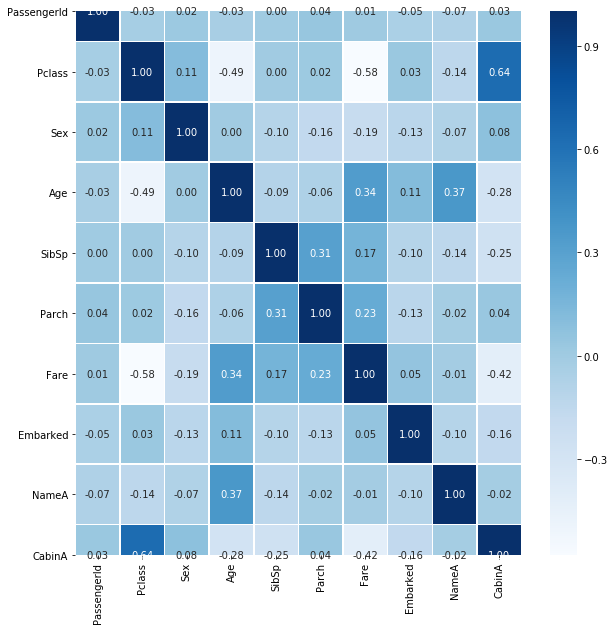

In [51]:
plt.figure(figsize = (10, 10))
sns.heatmap(data = pd_test_c.corr(),
            annot = True,
            fmt = '.2f',
            linewidths = .5,
            cmap = 'Blues')

In [52]:
corr_1 = lambda x: x.corrwith(x['Pclass']).sort_values().head(5)
corr_2 = lambda x: x.corrwith(x['Sex']).sort_values().head(5)
corr_3 = lambda x: x.corrwith(x['Age']).sort_values().head(5)
corr_4 = lambda x: x.corrwith(x['SibSp']).sort_values().head(5)
corr_5 = lambda x: x.corrwith(x['Parch']).sort_values().head(5)
corr_6 = lambda x: x.corrwith(x['Fare']).sort_values().head(5)
corr_7 = lambda x: x.corrwith(x['Embarked']).sort_values().head(5)
corr_8 = lambda x: x.corrwith(x['NameA']).sort_values().head(5)
corr_9 = lambda x: x.corrwith(x['CabinA']).sort_values().head(5)

In [53]:
corr_1_top = corr_1(pd_train_c)
corr_2_top = corr_2(pd_train_c)
corr_3_top = corr_3(pd_train_c)
corr_4_top = corr_4(pd_train_c)
corr_5_top = corr_5(pd_train_c)
corr_6_top = corr_6(pd_train_c)
corr_7_top = corr_7(pd_train_c)
corr_8_top = corr_8(pd_train_c)
corr_9_top = corr_9(pd_train_c)

In [54]:
def corr_1st(df):
    df['Pclass'] = df['Pclass'].fillna(pd_train_c[corr_1_top.index[0]].mean())
    df['Sex'] = df['Sex'].fillna(pd_train_c[corr_2_top.index[0]].mean())
    df['Age'] = df['Age'].fillna(pd_train_c[corr_3_top.index[0]].mean())
    df['SibSp'] = df['SibSp'].fillna(pd_train_c[corr_4_top.index[0]].mean())
    df['Parch'] = df['Parch'].fillna(pd_train_c[corr_5_top.index[0]].mean())
    df['Fare'] = df['Fare'].fillna(pd_train_c[corr_6_top.index[0]].mean())
    df['Embarked'] = df['Embarked'].fillna(pd_train_c[corr_7_top.index[0]].mean())
    df['NameA'] = df['NameA'].fillna(pd_train_c[corr_8_top.index[0]].mean())
    df['CabinA'] = df['CabinA'].fillna(pd_train_c[corr_9_top.index[0]].mean())
    return df

pd_train_c = corr_1st(pd_train_c)
pd_test_c = corr_1st(pd_test_c)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
NameA            0
CabinA           0
dtype: int64

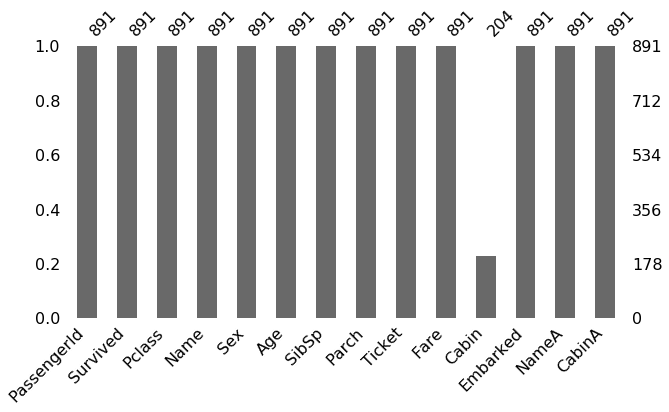

In [55]:
msno.bar(df = pd_train_c,
         figsize = (10, 5))
pd_train_c.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
NameA            0
CabinA           0
dtype: int64

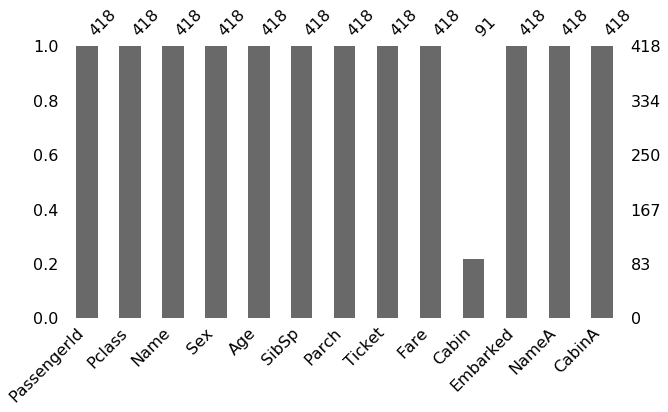

In [56]:
msno.bar(df = pd_test_c,
         figsize = (10, 5))
pd_test_c.isnull().sum()

In [57]:
pd_train_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null float64
NameA          891 non-null int32
CabinA         891 non-null float64
dtypes: float64(4), int32(2), int64(5), object(3)
memory usage: 90.6+ KB


# 5. 모델링

# 5.1 첫 번째 방법

In [58]:
target_a = pd_train_a[['Survived']]
feature_a = pd_train_a[['Pclass',
                        'Age',
                        'Sex',
                        'SibSp',
                        'Parch',
                        'Embarked',
                        'NameA',
                        'CabinA',
                        'Fare']]

In [59]:
X_train, X_val, y_train, y_val = train_test_split(feature_a,
                                                  target_a,
                                                  test_size = 0.3)

print(X_train.shape,
      X_val.shape,
      y_train.shape,
      y_val.shape)

(128, 9) (55, 9) (128, 1) (55, 1)


In [60]:
a_supportvectormachine_no_gridsearch = SVC()
a_supportvectormachine_no_gridsearch.fit(X_train,
                                         y_train)
a_supportvectormachine_no_gridsearch_predict = a_supportvectormachine_no_gridsearch.predict(X_val)
a_supportvectormachine_no_gridsearch_score = a_supportvectormachine_no_gridsearch.score(X_val,
                                                                                        y_val)
print(metrics.classification_report(y_val,
                                    a_supportvectormachine_no_gridsearch_predict))
print('Accuracy for SupportVectorMachine :', accuracy_score(y_val,
                                                            a_supportvectormachine_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       1.00      0.12      0.21        17
           1       0.72      1.00      0.84        38

    accuracy                           0.73        55
   macro avg       0.86      0.56      0.52        55
weighted avg       0.80      0.73      0.64        55

Accuracy for SupportVectorMachine : 0.7272727272727273


In [61]:
a_perceptron_no_gridsearch = Perceptron()
a_perceptron_no_gridsearch.fit(X_train,
                               y_train)
a_perceptron_no_gridsearch_predict = a_perceptron_no_gridsearch.predict(X_val)
a_perceptron_no_gridsearch_score = a_perceptron_no_gridsearch.score(X_val,
                                                                    y_val)
print(metrics.classification_report(y_val,
                                    a_perceptron_no_gridsearch_predict))
print('Accuracy for Perceptron :', accuracy_score(y_val,
                                                  a_perceptron_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.24      0.53      0.33        17
           1       0.56      0.26      0.36        38

    accuracy                           0.35        55
   macro avg       0.40      0.40      0.35        55
weighted avg       0.46      0.35      0.35        55

Accuracy for Perceptron : 0.34545454545454546


In [62]:
a_multilayerperceptron_no_gridsearch = MLPClassifier()
a_multilayerperceptron_no_gridsearch.fit(X_train,
                                         y_train)
a_multilayerperceptron_no_gridsearch_predict = a_multilayerperceptron_no_gridsearch.predict(X_val)
a_multilayerperceptron_no_gridsearch_score = a_multilayerperceptron_no_gridsearch.score(X_val,
                                                                                        y_val)
print(metrics.classification_report(y_val,
                                    a_multilayerperceptron_no_gridsearch_predict))
print('Accuracy for MultiLayerPerceptron :', accuracy_score(y_val,
                                                            a_multilayerperceptron_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.44      0.47      0.46        17
           1       0.76      0.74      0.75        38

    accuracy                           0.65        55
   macro avg       0.60      0.60      0.60        55
weighted avg       0.66      0.65      0.66        55

Accuracy for MultiLayerPerceptron : 0.6545454545454545


In [63]:
a_decisiontree_no_gridsearch = DecisionTreeClassifier()
a_decisiontree_no_gridsearch.fit(X_train,
                                 y_train)
a_decisiontree_no_gridsearch_predict = a_decisiontree_no_gridsearch.predict(X_val)
a_decisiontree_no_gridsearch_score = a_decisiontree_no_gridsearch.score(X_val,
                                                                        y_val)
print(metrics.classification_report(y_val,
                                    a_decisiontree_no_gridsearch_predict))
print('Accuracy for DecisionTree :', accuracy_score(y_val,
                                                    a_decisiontree_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65        17
           1       0.86      0.79      0.82        38

    accuracy                           0.76        55
   macro avg       0.73      0.75      0.74        55
weighted avg       0.78      0.76      0.77        55

Accuracy for DecisionTree : 0.7636363636363637


In [64]:
a_knearestneighbors_no_gridsearch = KNeighborsClassifier()
a_knearestneighbors_no_gridsearch.fit(X_train,
                                      y_train)
a_knearestneighbors_no_gridsearch_predict = a_knearestneighbors_no_gridsearch.predict(X_val)
a_knearestneighbors_no_gridsearch_score = a_knearestneighbors_no_gridsearch.score(X_val,
                                                                                  y_val)
print(metrics.classification_report(y_val,
                                    a_knearestneighbors_no_gridsearch_predict))
print('Accuracy for KNearestNeighbors :', accuracy_score(y_val,
                                                         a_knearestneighbors_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.50      0.29      0.37        17
           1       0.73      0.87      0.80        38

    accuracy                           0.69        55
   macro avg       0.62      0.58      0.58        55
weighted avg       0.66      0.69      0.66        55

Accuracy for KNearestNeighbors : 0.6909090909090909


In [65]:
a_randomforest_no_gridsearch = RandomForestClassifier()
a_randomforest_no_gridsearch.fit(X_train,
                                 y_train)
a_randomforest_no_gridsearch_predict = a_randomforest_no_gridsearch.predict(X_val)
a_randomforest_no_gridsearch_score = a_randomforest_no_gridsearch.score(X_val,
                                                                        y_val)
print(metrics.classification_report(y_val,
                                    a_randomforest_no_gridsearch_predict))
print('Accuracy for RandomForest :', accuracy_score(y_val,
                                                    a_randomforest_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        17
           1       0.82      0.82      0.82        38

    accuracy                           0.75        55
   macro avg       0.70      0.70      0.70        55
weighted avg       0.75      0.75      0.75        55

Accuracy for RandomForest : 0.7454545454545455


In [66]:
a_xgboost_no_gridsearch = XGBClassifier()
a_xgboost_no_gridsearch.fit(X_train,
                            y_train)
a_xgboost_no_gridsearch_predict = a_xgboost_no_gridsearch.predict(X_val)
a_xgboost_no_gridsearch_score = a_xgboost_no_gridsearch.score(X_val,
                                                              y_val)
print(metrics.classification_report(y_val,
                                    a_xgboost_no_gridsearch_predict))
print('Accuracy for XGBoost :', accuracy_score(y_val,
                                               a_xgboost_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58        17
           1       0.80      0.87      0.84        38

    accuracy                           0.76        55
   macro avg       0.72      0.70      0.71        55
weighted avg       0.75      0.76      0.76        55

Accuracy for XGBoost : 0.7636363636363637


# 5.2 두 번째 방법

In [67]:
target_b = pd_train_b[['Survived']]
feature_b = pd_train_b[['Pclass',
                        'Age',
                        'Sex',
                        'SibSp',
                        'Parch',
                        'Embarked',
                        'NameA',
                        'CabinA',
                        'Fare']]

In [68]:
X_train, X_val, y_train, y_val = train_test_split(feature_b,
                                                  target_b,
                                                  test_size = 0.3)

print(X_train.shape,
      X_val.shape,
      y_train.shape,
      y_val.shape)

(623, 9) (268, 9) (623, 1) (268, 1)


In [69]:
b_supportvectormachine_no_gridsearch = SVC()
b_supportvectormachine_no_gridsearch.fit(X_train,
                                         y_train)
b_supportvectormachine_no_gridsearch_predict = b_supportvectormachine_no_gridsearch.predict(X_val)
b_supportvectormachine_no_gridsearch_score = b_supportvectormachine_no_gridsearch.score(X_val,
                                                                                        y_val)
print(metrics.classification_report(y_val,
                                    b_supportvectormachine_no_gridsearch_predict))
print('Accuracy for SupportVectorMachine :', accuracy_score(y_val,
                                                            b_supportvectormachine_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       159
           1       0.58      0.55      0.57       109

    accuracy                           0.66       268
   macro avg       0.64      0.64      0.64       268
weighted avg       0.65      0.66      0.66       268

Accuracy for SupportVectorMachine : 0.6567164179104478


In [70]:
b_perceptron_no_gridsearch = Perceptron()
b_perceptron_no_gridsearch.fit(X_train,
                               y_train)
b_perceptron_no_gridsearch_predict = b_perceptron_no_gridsearch.predict(X_val)
b_perceptron_no_gridsearch_score = b_perceptron_no_gridsearch.score(X_val,
                                                                    y_val)
print(metrics.classification_report(y_val,
                                    b_perceptron_no_gridsearch_predict))
print('Accuracy for Perceptron :', accuracy_score(y_val,
                                                  b_perceptron_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       159
           1       0.64      0.35      0.45       109

    accuracy                           0.66       268
   macro avg       0.65      0.61      0.60       268
weighted avg       0.65      0.66      0.63       268

Accuracy for Perceptron : 0.6567164179104478


In [71]:
b_multilayerperceptron_no_gridsearch = MLPClassifier()
b_multilayerperceptron_no_gridsearch.fit(X_train,
                                         y_train)
b_multilayerperceptron_no_gridsearch_predict = b_multilayerperceptron_no_gridsearch.predict(X_val)
b_multilayerperceptron_no_gridsearch_score = b_multilayerperceptron_no_gridsearch.score(X_val,
                                                                                        y_val)
print(metrics.classification_report(y_val,
                                    b_multilayerperceptron_no_gridsearch_predict))
print('Accuracy for MultiLayerPerceptron :', accuracy_score(y_val,
                                                            b_multilayerperceptron_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       159
           1       0.72      0.68      0.70       109

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

Accuracy for MultiLayerPerceptron : 0.7611940298507462


In [72]:
b_decisiontree_no_gridsearch = DecisionTreeClassifier()
b_decisiontree_no_gridsearch.fit(X_train,
                                 y_train)
b_decisiontree_no_gridsearch_predict = b_decisiontree_no_gridsearch.predict(X_val)
b_decisiontree_no_gridsearch_score = b_decisiontree_no_gridsearch.score(X_val,
                                                                        y_val)
print(metrics.classification_report(y_val,
                                    b_decisiontree_no_gridsearch_predict))
print('Accuracy for DecisionTree :', accuracy_score(y_val,
                                                    b_decisiontree_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       159
           1       0.68      0.67      0.68       109

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268

Accuracy for DecisionTree : 0.7388059701492538


In [73]:
b_knearestneighbors_no_gridsearch = KNeighborsClassifier()
b_knearestneighbors_no_gridsearch.fit(X_train,
                                      y_train)
b_knearestneighbors_no_gridsearch_predict = b_knearestneighbors_no_gridsearch.predict(X_val)
b_knearestneighbors_no_gridsearch_score = b_knearestneighbors_no_gridsearch.score(X_val,
                                                                                  y_val)
print(metrics.classification_report(y_val,
                                    b_knearestneighbors_no_gridsearch_predict))
print('Accuracy for KNearestNeighbors :', accuracy_score(y_val,
                                                         b_knearestneighbors_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.67      0.82      0.73       159
           1       0.60      0.40      0.48       109

    accuracy                           0.65       268
   macro avg       0.63      0.61      0.61       268
weighted avg       0.64      0.65      0.63       268

Accuracy for KNearestNeighbors : 0.6492537313432836


In [74]:
b_randomforest_no_gridsearch = RandomForestClassifier()
b_randomforest_no_gridsearch.fit(X_train,
                                 y_train)
b_randomforest_no_gridsearch_predict = b_randomforest_no_gridsearch.predict(X_val)
b_randomforest_no_gridsearch_score = b_randomforest_no_gridsearch.score(X_val,
                                                                        y_val)
print(metrics.classification_report(y_val,
                                    b_randomforest_no_gridsearch_predict))
print('Accuracy for RandomForest :', accuracy_score(y_val,
                                                    b_randomforest_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       159
           1       0.84      0.68      0.75       109

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268

Accuracy for RandomForest : 0.8171641791044776


In [75]:
b_xgboost_no_gridsearch = XGBClassifier()
b_xgboost_no_gridsearch.fit(X_train,
                            y_train)
b_xgboost_no_gridsearch_predict = b_xgboost_no_gridsearch.predict(X_val)
b_xgboost_no_gridsearch_score = b_xgboost_no_gridsearch.score(X_val,
                                                              y_val)
print(metrics.classification_report(y_val,
                                    b_xgboost_no_gridsearch_predict))
print('Accuracy for XGBoost :', accuracy_score(y_val,
                                               b_xgboost_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       159
           1       0.81      0.66      0.73       109

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.79       268

Accuracy for XGBoost : 0.7985074626865671


# 5.3 세 번째 방법

In [76]:
target_c = pd_train_c[['Survived']]
feature_c = pd_train_c[['Pclass',
                        'Age',
                        'Sex',
                        'SibSp',
                        'Parch',
                        'Embarked',
                        'NameA',
                        'CabinA',
                        'Fare']]

In [77]:
X_train, X_val, y_train, y_val = train_test_split(feature_c,
                                                  target_c,
                                                  test_size = 0.3)

print(X_train.shape,
      X_val.shape,
      y_train.shape,
      y_val.shape)

(623, 9) (268, 9) (623, 1) (268, 1)


In [78]:
c_supportvectormachine_no_gridsearch = SVC()
c_supportvectormachine_no_gridsearch.fit(X_train,
                                         y_train)
c_supportvectormachine_no_gridsearch_predict = c_supportvectormachine_no_gridsearch.predict(X_val)
c_supportvectormachine_no_gridsearch_score = c_supportvectormachine_no_gridsearch.score(X_val,
                                                                                        y_val)
print(metrics.classification_report(y_val,
                                    c_supportvectormachine_no_gridsearch_predict))
print('Accuracy for SupportVectorMachine :', accuracy_score(y_val,
                                                            c_supportvectormachine_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       160
           1       0.62      0.69      0.65       108

    accuracy                           0.70       268
   macro avg       0.69      0.70      0.69       268
weighted avg       0.71      0.70      0.70       268

Accuracy for SupportVectorMachine : 0.7014925373134329


In [79]:
c_perceptron_no_gridsearch = Perceptron()
c_perceptron_no_gridsearch.fit(X_train,
                               y_train)
c_perceptron_no_gridsearch_predict = c_perceptron_no_gridsearch.predict(X_val)
c_perceptron_no_gridsearch_score = c_perceptron_no_gridsearch.score(X_val,
                                                                    y_val)
print(metrics.classification_report(y_val,
                                    c_perceptron_no_gridsearch_predict))
print('Accuracy for Perceptron :', accuracy_score(y_val,
                                                  c_perceptron_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79       160
           1       0.76      0.36      0.49       108

    accuracy                           0.70       268
   macro avg       0.72      0.64      0.64       268
weighted avg       0.72      0.70      0.67       268

Accuracy for Perceptron : 0.6977611940298507


In [80]:
c_multilayerperceptron_no_gridsearch = MLPClassifier()
c_multilayerperceptron_no_gridsearch.fit(X_train,
                                         y_train)
c_multilayerperceptron_no_gridsearch_predict = c_multilayerperceptron_no_gridsearch.predict(X_val)
c_multilayerperceptron_no_gridsearch_score = c_multilayerperceptron_no_gridsearch.score(X_val,
                                                                                        y_val)
print(metrics.classification_report(y_val,
                                    c_multilayerperceptron_no_gridsearch_predict))
print('Accuracy for MultiLayerPerceptron :', accuracy_score(y_val,
                                                            c_multilayerperceptron_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       160
           1       0.68      0.78      0.73       108

    accuracy                           0.76       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.77      0.76      0.77       268

Accuracy for MultiLayerPerceptron : 0.7649253731343284


In [81]:
c_decisiontree_no_gridsearch = DecisionTreeClassifier()
c_decisiontree_no_gridsearch.fit(X_train,
                                 y_train)
c_decisiontree_no_gridsearch_predict = c_decisiontree_no_gridsearch.predict(X_val)
c_decisiontree_no_gridsearch_score = c_decisiontree_no_gridsearch.score(X_val,
                                                                        y_val)
print(metrics.classification_report(y_val,
                                    c_decisiontree_no_gridsearch_predict))
print('Accuracy for DecisionTree :', accuracy_score(y_val,
                                                    c_decisiontree_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       160
           1       0.67      0.74      0.70       108

    accuracy                           0.75       268
   macro avg       0.74      0.75      0.74       268
weighted avg       0.76      0.75      0.75       268

Accuracy for DecisionTree : 0.75


In [82]:
c_knearestneighbors_no_gridsearch = KNeighborsClassifier()
c_knearestneighbors_no_gridsearch.fit(X_train,
                                      y_train)
c_knearestneighbors_no_gridsearch_predict = c_knearestneighbors_no_gridsearch.predict(X_val)
c_knearestneighbors_no_gridsearch_score = c_knearestneighbors_no_gridsearch.score(X_val,
                                                                                  y_val)
print(metrics.classification_report(y_val,
                                    c_knearestneighbors_no_gridsearch_predict))
print('Accuracy for KNearestNeighbors :', accuracy_score(y_val,
                                                         c_knearestneighbors_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       160
           1       0.66      0.58      0.62       108

    accuracy                           0.71       268
   macro avg       0.70      0.69      0.69       268
weighted avg       0.71      0.71      0.71       268

Accuracy for KNearestNeighbors : 0.7089552238805971


In [83]:
c_randomforest_no_gridsearch = RandomForestClassifier()
c_randomforest_no_gridsearch.fit(X_train,
                                 y_train)
c_randomforest_no_gridsearch_predict = c_randomforest_no_gridsearch.predict(X_val)
c_randomforest_no_gridsearch_score = c_randomforest_no_gridsearch.score(X_val,
                                                                        y_val)
print(metrics.classification_report(y_val,
                                    c_randomforest_no_gridsearch_predict))
print('Accuracy for RandomForest :', accuracy_score(y_val,
                                                    c_randomforest_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       160
           1       0.84      0.74      0.79       108

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268

Accuracy for RandomForest : 0.8395522388059702


In [84]:
c_xgboost_no_gridsearch = XGBClassifier()
c_xgboost_no_gridsearch.fit(X_train,
                            y_train)
c_xgboost_no_gridsearch_predict = c_xgboost_no_gridsearch.predict(X_val)
c_xgboost_no_gridsearch_score = c_xgboost_no_gridsearch.score(X_val,
                                                              y_val)
print(metrics.classification_report(y_val,
                                    c_xgboost_no_gridsearch_predict))
print('Accuracy for XGBoost :', accuracy_score(y_val,
                                               c_xgboost_no_gridsearch_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       160
           1       0.81      0.74      0.77       108

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.82      0.82      0.82       268

Accuracy for XGBoost : 0.8246268656716418


# 6. 학습 모델 성능 비교

In [85]:
models = pd.DataFrame({'Model' : ['SupportVectorMachine',
                                  'Perceptron',
                                  'MultiLayerPerceptron',
                                  'DecisionTree',
                                  'KNearestNeighbors',
                                  'RandomForest',
                                  'XGBoost'],
                       'Score(결측값 → 생략)' : [a_supportvectormachine_no_gridsearch_score,
                                                 a_perceptron_no_gridsearch_score,
                                                 a_multilayerperceptron_no_gridsearch_score,
                                                 a_decisiontree_no_gridsearch_score,
                                                 a_knearestneighbors_no_gridsearch_score,
                                                 a_randomforest_no_gridsearch_score,
                                                 a_xgboost_no_gridsearch_score],
                       'Score(결측값 → 대표값 대체)' : [b_supportvectormachine_no_gridsearch_score,
                                                        b_perceptron_no_gridsearch_score,
                                                        b_multilayerperceptron_no_gridsearch_score,
                                                        b_decisiontree_no_gridsearch_score,
                                                        b_knearestneighbors_no_gridsearch_score,
                                                        b_randomforest_no_gridsearch_score,
                                                        b_xgboost_no_gridsearch_score],
                       'Score(결측값 → 상관분석)' : [c_supportvectormachine_no_gridsearch_score,
                                                     c_perceptron_no_gridsearch_score,
                                                     c_multilayerperceptron_no_gridsearch_score,
                                                           c_decisiontree_no_gridsearch_score,
                                                     c_knearestneighbors_no_gridsearch_score,
                                                     c_randomforest_no_gridsearch_score,
                                                     c_xgboost_no_gridsearch_score]})
models = models.set_index('Model')
models.sort_values(by = 'Score(결측값 → 생략)',
                   ascending = False)

,Score(결측값 → 생략),Score(결측값 → 대표값 대체),Score(결측값 → 상관분석)
Model,,,
DecisionTree,0.763636,0.738806,0.750000
XGBoost,0.763636,0.798507,0.824627
RandomForest,0.745455,0.817164,0.839552
SupportVectorMachine,0.727273,0.656716,0.701493
KNearestNeighbors,0.690909,0.649254,0.708955
MultiLayerPerceptron,0.654545,0.761194,0.764925
Perceptron,0.345455,0.656716,0.697761
